In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
def create_X_Y(ts: np.array, lag=1, n_ahead=1, target_index=-1) -> tuple:
    """
    A method to create X and Y matrix from a time series array for the training of 
    deep learning models 
    """
    # Creating placeholder lists
    X, Y = [], []

    for i in range(len(ts) - lag - n_ahead):
        Y.append(ts[(i + lag), target_index])
        # X.append(ts[i:(i + lag)])

    ts = np.delete(ts, -1, axis=1)
    # Extracting the number of features that are passed from the array 
    n_features = ts.shape[1]
    if len(ts) - lag <= 0:
        X.append(np.concatenate(ts))
    else:
        for i in range(len(ts) - lag - n_ahead):
            X.append(np.concatenate(ts[i+1:(i + lag + 1)]))

    X = np.array(X)
    Y = np.array(Y)

    # Reshaping the X array to an RNN input shape 
    # X = np.reshape(X, (X.shape[0], lag, n_features))

    return X, Y

In [3]:
df2005 = pd.read_csv("../data/forModels/clean_data_2005.csv", sep = ',')
df2005.index = pd.to_datetime(df2005.Date, format="%d.%m.%Y")
df2005 = df2005.drop(['Date'], axis=1)

df2006 = pd.read_csv("../data/forModels/clean_data_2006.csv", sep = ',')
df2006.index = pd.to_datetime(df2006.Date, format="%d.%m.%Y")
df2006 = df2006.drop(['Date'], axis=1)

print(f'Shape of data 2005: {df2005.shape}')
print(f'Shape of data 2006: {df2006.shape}')

df = pd.concat([df2005, df2006], axis=0)


Shape of data 2005: (165, 5)
Shape of data 2006: (165, 5)


In [4]:
# Share of obs in testing 
test_share = 0.2

# The features used in the modeling 
# features_final = ['Avg', 'Dev', 'Rain', 'DD', 'DD Sum', 'CountTrap1', 'CountTrap2', 'CountTrap3', 'Sum']
features_final = ['Avg', 'DDSum', 'Rain', 'Sum_trap']

In [5]:
ts = df[features_final]

nrows = ts.shape[0]

# Spliting into train and test sets
train = ts[0:int(nrows * (1 - test_share))]
test = ts[int(nrows * (1 - test_share)):]

# Scaling the data 
# train_mean = train.mean()
# train_std = train.std()

# train = (train - train_mean) / train_std
# test = (test - train_mean) / train_std

# Creating the final scaled frame 
ts_s = pd.concat([train, test])
ts_s

,Avg,DDSum,Rain,Sum_trap
Date,,,,
2005-05-01,12.93,32.13,0.0,0.0
2005-05-02,15.07,37.21,0.0,0.0
2005-05-03,16.30,43.51,3.0,0.0
2005-05-04,13.23,46.74,6.1,0.0
2005-05-05,9.33,46.74,23.0,0.0
...,...,...,...,...
2006-10-08,11.54,1149.50,0.0,0.0
2006-10-09,11.44,1150.94,0.0,0.0
2006-10-10,10.61,1151.55,0.0,0.0


In [69]:
# Number of lags to use for models
lag = 30
# Steps ahead to forecast 
n_ahead = 5

X, y = create_X_Y(ts_s.values, lag=lag, n_ahead=n_ahead)
X_train = X[int(0.2*len(X)):]
y_train = y[int(0.2*len(X)):]
X_test = X[:int(0.2*len(X))]
y_test = y[:int(0.2*len(y))]


In [78]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
 
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y_train)

LinearRegression()

In [79]:
X_poly_test = poly_reg.fit_transform(X_test)

In [80]:
y_pred = lin_reg2.predict(X_poly_test)

In [81]:
y_pred

array([ 2.41008727,  1.75064686,  2.05716581,  2.3393786 ,  2.32435645,
        2.16371635,  2.53440795,  3.15168699,  4.07098684,  4.13827619,
        4.33564494,  4.04059513,  2.98419883,  2.86108698,  3.35683689,
        3.58709973,  4.24260379,  5.91979063,  5.59870367,  4.11056265,
        4.31049813,  5.04863447,  6.95832604,  6.91950266,  4.74475613,
        4.47261818,  5.34247762,  6.57960073,  4.86036485,  3.42274388,
        2.62174756,  1.59655098,  4.7287255 ,  6.81975133,  6.80370288,
        5.96800791,  9.04279994,  8.63742123,  4.56595771,  8.05696206,
       12.52662924,  8.01034708,  3.46981756, 10.44946243,  7.13659405,
        3.65151914,  0.27666797,  2.18521968,  1.90248627,  3.64169798,
        4.66776222,  7.3153958 , 11.39281431, 14.83450473, 13.77954799,
        8.99796858,  9.12610855,  8.58486503, 10.11289488])

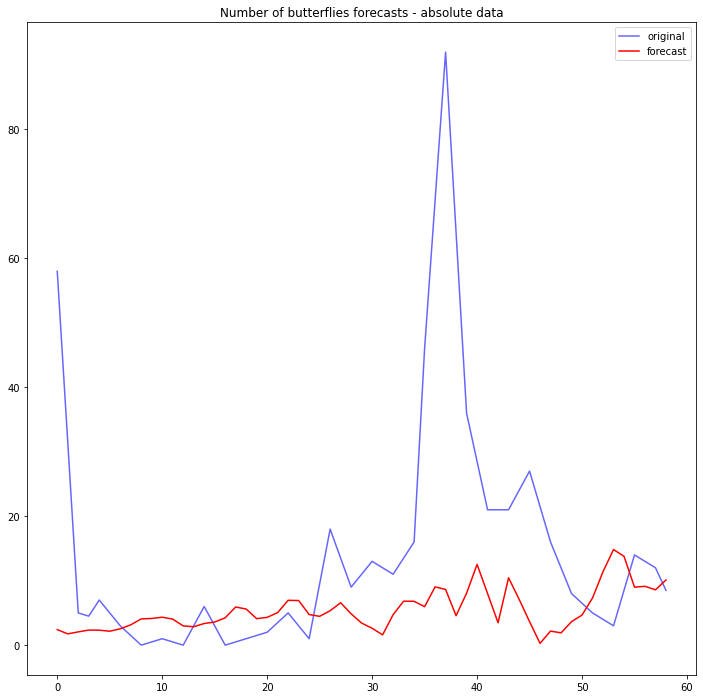

In [82]:
plt.figure(figsize=(12, 12))
plt.plot(range(len(y_pred)), y_test, color='blue', label='original', alpha=0.6)
plt.plot(range(len(y_pred)), y_pred, color='red', label='forecast')
plt.title('Number of butterflies forecasts - absolute data')
plt.legend()
plt.show()

In [83]:
y_pred_train = lin_reg2.predict(X_poly)

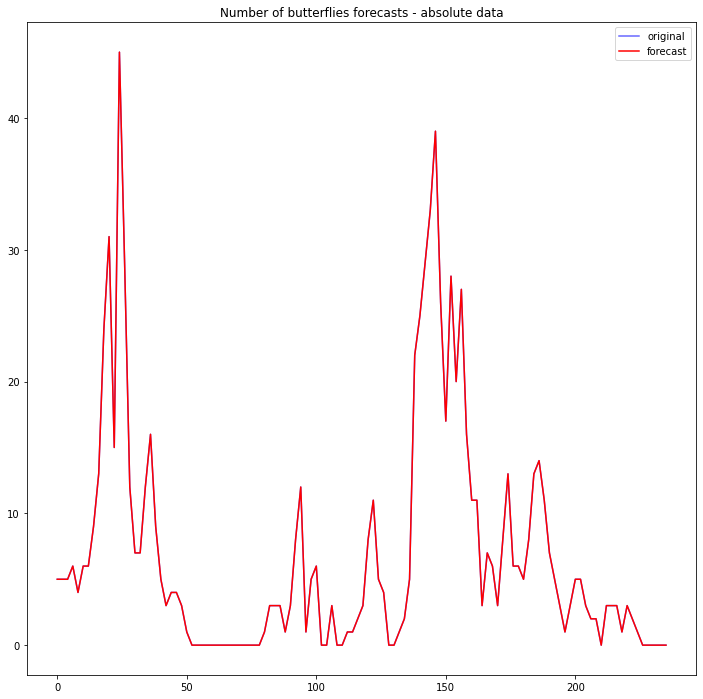

In [84]:
plt.figure(figsize=(12, 12))
plt.plot(range(len(y_pred_train)), y_train, color='blue', label='original', alpha=0.6)
plt.plot(range(len(y_pred_train)), y_pred_train, color='red', label='forecast')
plt.title('Number of butterflies forecasts - absolute data')
plt.legend()
plt.show()